# 📊 Diwali Sales Analysis

## 🎯 Objective:
To analyze Diwali sales data and discover patterns in customer behavior, product preferences, and demographic trends to support data-driven business decisions.


##### Importing Required Libraries

In [2]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To display plots inside the notebook
%matplotlib inline

# Optional: Configure plot style
sns.set(style='whitegrid')

##### Loading the Dataset

In [3]:
# Load Dataset
df = pd.read_csv('Diwali Sales Data.csv', encoding='unicode_escape')

# View Top 5 Rows
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


##### Basic Dataset Info

In [6]:
# Basic Dataset Overview
df.shape              # Rows & Columns
df.info()             # Data types & non-null values
df.describe()         # Statistical summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


##### Data Cleaning / Preprocessing

In [ ]:
# Remove Unnecessary Columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

# Drop Null Values
df.dropna(inplace=True)

# Convert Amount column to integer
df['Amount'] = df['Amount'].astype(int)

# Rename Columns (Optional for clarity)
df.rename(columns={'Zone': 'Region'}, inplace=True)

In [9]:
# Final Cleaned Data Preview
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Region,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799
10,1003829,Harshita,P00200842,M,26-35,34,0,Delhi,Central,Banking,Auto,1,23770


##### Exploratory Data Analysis 

#### Gender

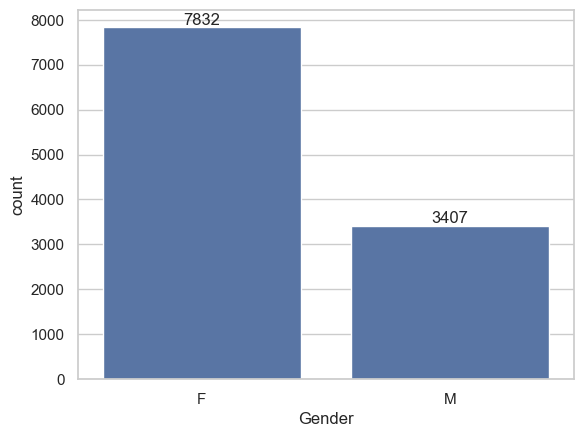

In [12]:
# Plotting count of purchases by Gender 
ax = sns.countplot(x='Gender', data=df)  

for bars in ax.containers:
    ax.bar_label(bars)

In [13]:
# Grouping total purchase amount by Gender and sorting in descending order
df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

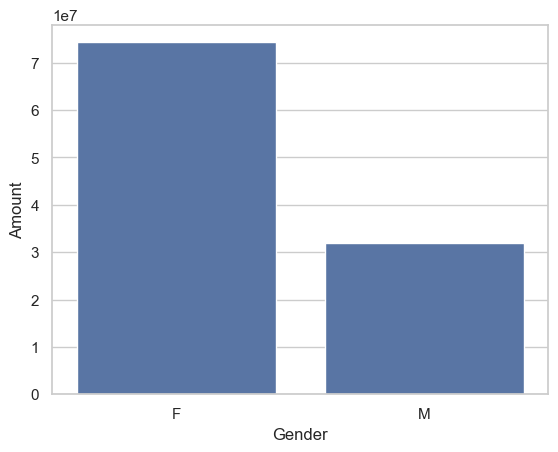

In [14]:
# Barplot of total sales (Amount) by Gender, sorted in descending order
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x='Gender', y='Amount', data=sales_gen)


###### ✅Insights: From above graph we can see that most of the buyers are females and even the purchasing power of females are greatervthan men.

#### Age

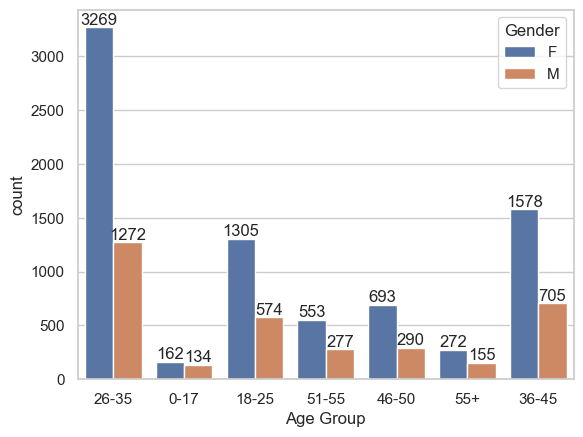

In [16]:
# Count of customers by Age Group and Gender
ax= sns.countplot(data=df,x='Age Group',hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

In [17]:
# Barplot of total purchase amount by Age Group, sorted in descending order
df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


<Axes: xlabel='Age Group', ylabel='Amount'>

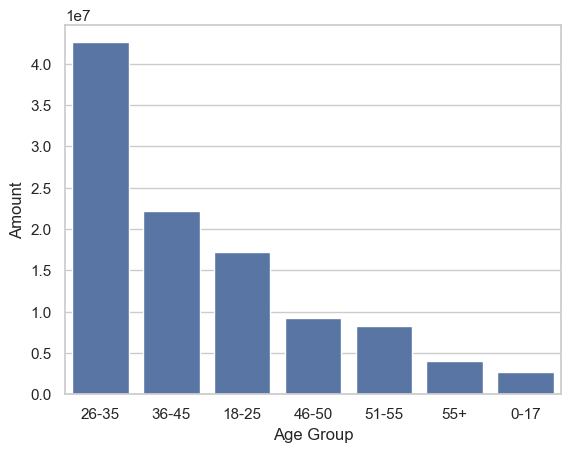

In [18]:
# Barplot of total purchase amount by Age Group, sorted in descending order
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Age Group', y='Amount', data=sales_age)

###### ✅Insights: From above graphs can see that most of the buyers are of age group between 26-35yrs female.

#### State

In [19]:
# Top 10 states by total number of orders sorted in descending order
df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


<Axes: xlabel='State', ylabel='Orders'>

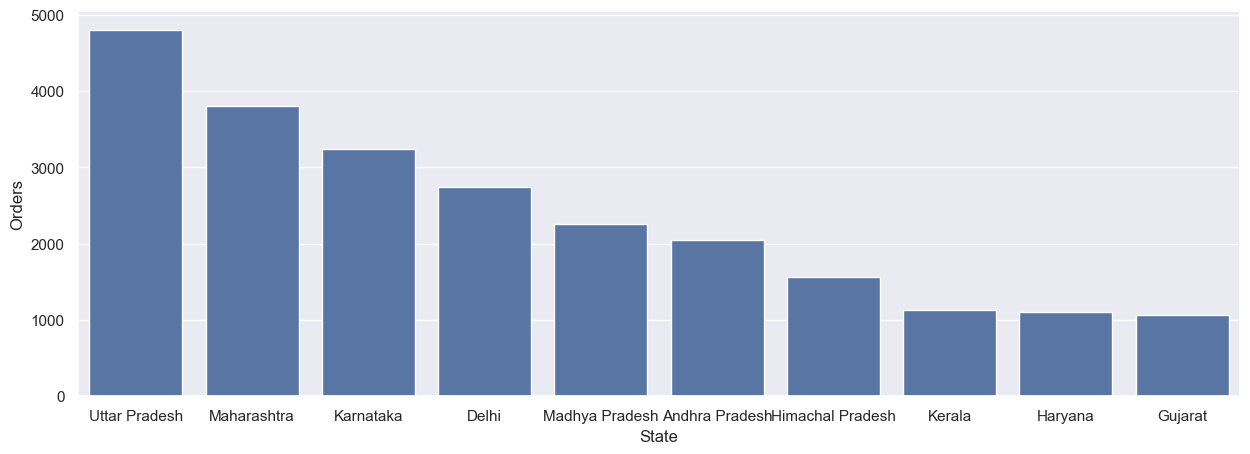

In [20]:
# Barplot of total number of orders from top 10 states
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize': (15, 5)})
sns.barplot(data=sales_state, x='State', y='Orders')

In [21]:
# Top 10 states by total purchase amount sorted in descending order
df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


<Axes: xlabel='State', ylabel='Amount'>

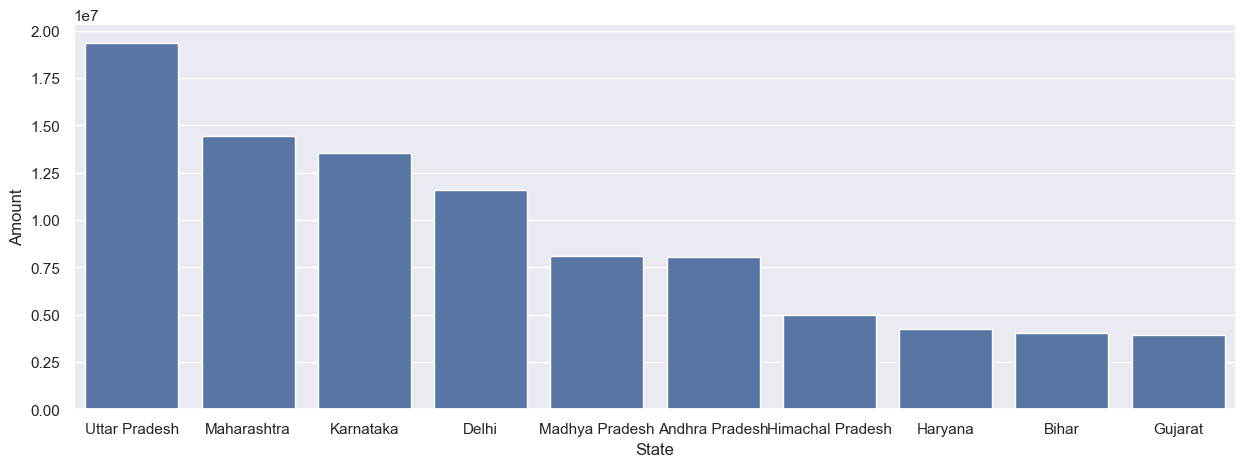

In [22]:
# Barplot of total amount or sales from top 10 states
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize': (15, 5)})
sns.barplot(data=sales_state, x='State', y='Amount')

###### ✅Insights: From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh,Maharashtra and Karnataka respectively.

#### Marital Status

In [30]:
# Total purchase amount by marital status and gender sorted in descending order
df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

,Marital_Status,Gender,Amount
0,0,F,43786646
2,1,F,30549207
1,0,M,18338738
3,1,M,13574538


<Axes: xlabel='Marital_Status', ylabel='Amount'>

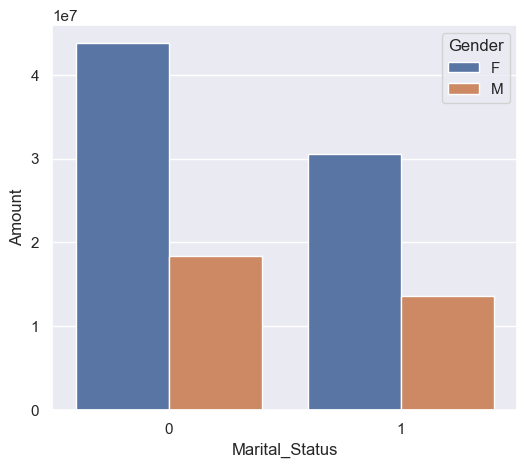

In [31]:
# Barplot of total purchase amount by marital status and gender
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize': (6, 5)})
sns.barplot(data=sales_state, x='Marital_Status', y='Amount', hue='Gender')

###### ✅Insights: From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

#### Occupation

In [33]:
# Total purchase amount by occupation sorted in descending order
df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

,Occupation,Amount
10,IT Sector,14755079
8,Healthcare,13034586
2,Aviation,12602298
3,Banking,10770610
7,Govt,8517212
9,Hospitality,6376405
12,Media,6295832
1,Automobile,5368596
4,Chemical,5297436
11,Lawyer,4981665


<Axes: xlabel='Occupation', ylabel='Amount'>

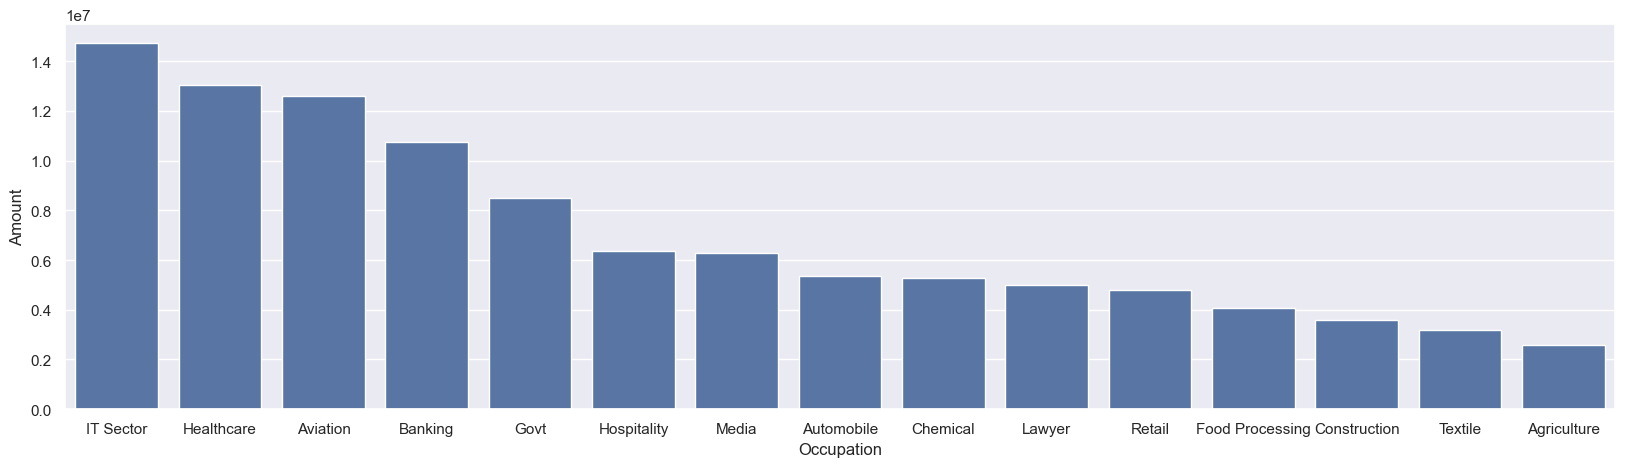

In [34]:
# Barplot of total purchase amount by occupation sorted in descending order
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize': (20, 5)})
sns.barplot(data=sales_state, x='Occupation', y='Amount')

###### ✅Insights: From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

#### Product Category

In [35]:
# Top 10 product categories by total purchase amount sorted in descending order
df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

,Product_Category,Amount
6,Food,33933883
3,Clothing & Apparel,16495019
5,Electronics & Gadgets,15643846
7,Footwear & Shoes,15575209
8,Furniture,5440051
9,Games & Toys,4331694
14,Sports Products,3635933
1,Beauty,1959484
0,Auto,1958609
15,Stationery,1676051


<Axes: xlabel='Product_Category', ylabel='Amount'>

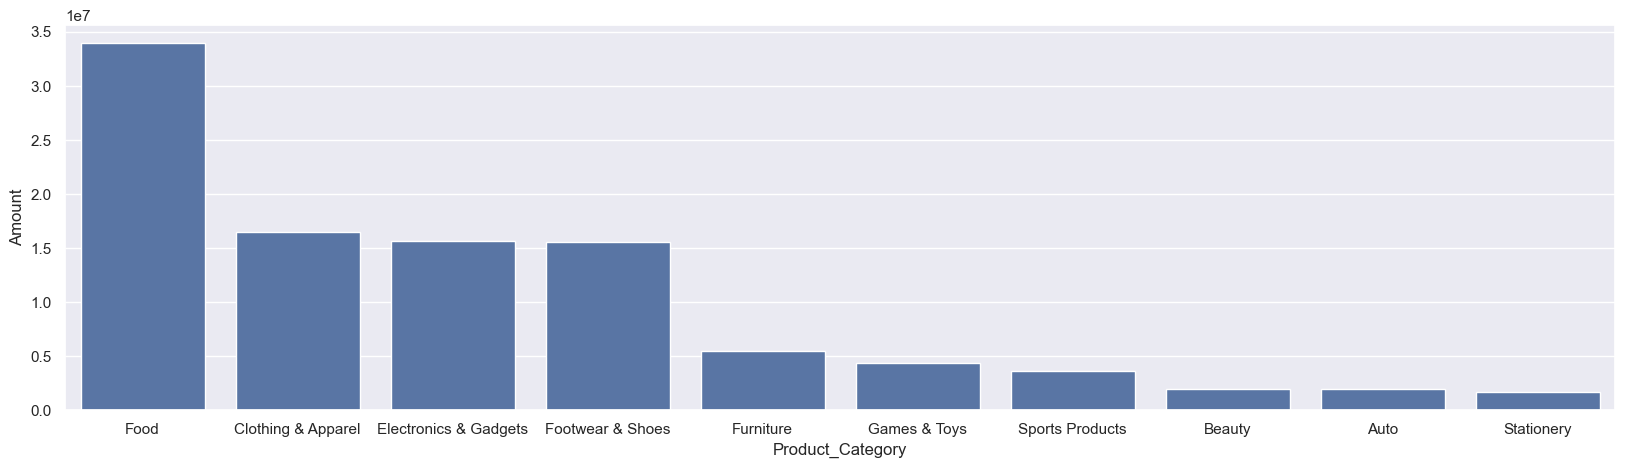

In [36]:
# Barplot of top 10 product categories by total purchase amount
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize': (20, 5)})
sns.barplot(data=sales_state, x='Product_Category', y='Amount')

###### ✅Insights: From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category.

#### Conclusion

###### Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category